In [39]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
import random

In [40]:
from keras import layers

In [41]:
my_list = list(range(1, 202599));
random.shuffle(my_list);

In [87]:
encoding_dim = 32
input_img = keras.Input(shape=(116412,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = layers.Dense(116412, activation='sigmoid')(encoded)
autoencoder = keras.Model(input_img, decoded)
encoder = keras.Model(input_img, encoded)
encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [187]:
input_img1 = keras.Input(shape=(220, 180, 3))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img1)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded1 = layers.MaxPooling2D((2, 2), padding='same')(x)

encoder1 = keras.Model(input_img1, encoded1)
encoded_input1 = keras.Input(shape = (None, 55, 45, 32)) 

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded1)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded2 = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder1 = keras.Model(input_img1, decoded2)
autoencoder1.compile(optimizer='adam', loss='binary_crossentropy')

decoded1 = autoencoder1.layers[-1]
decoder1 = keras.Model(encoded_input1, decoded1(encoded_input1))

In [178]:
autoencoder1.summary()

Model: "model_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_45 (InputLayer)        [(None, 220, 180, 3)]     0         
_________________________________________________________________
conv2d_154 (Conv2D)          (None, 220, 180, 32)      896       
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 110, 90, 32)       0         
_________________________________________________________________
conv2d_155 (Conv2D)          (None, 110, 90, 32)       9248      
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 55, 45, 32)        0         
_________________________________________________________________
conv2d_156 (Conv2D)          (None, 55, 45, 32)        9248      
_________________________________________________________________
up_sampling2d_50 (UpSampling (None, 110, 90, 32)       0  

In [180]:
x_train = list()
for i in range(1,900):
    x_train.append((np.pad(image.imread("../img_align_celeba/"  + "000000"[0:(6 - len(str(my_list[i])))] + str(my_list[i]) + ".jpg").reshape(218, 178, 3), ((1,1),(1,1),(0,0)), "edge")))
x_train = np.array(x_train)
x_train = x_train.astype('float32') / 255.

In [181]:
x_test = list()
for i in range(900, 1000):
    x_test.append((np.pad(image.imread("../img_align_celeba/"  + "000000"[0:(6 - len(str(my_list[i])))] + str(my_list[i]) + ".jpg").reshape(218, 178, 3), ((1,1),(1,1),(0,0)), "edge")))
x_test = np.array(x_test)
x_test = x_test.astype('float32') / 255.

In [62]:
print(x_train.shape)
print(x_test.shape)

(9000, 116412)
(1000, 116412)


In [63]:
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=50,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
180/180 [==============================] - 70s 374ms/step - loss: 0.5825 - val_loss: 0.5825
Epoch 2/5
180/180 [==============================] - 71s 395ms/step - loss: 0.5810 - val_loss: 0.5817
Epoch 3/5
180/180 [==============================] - 66s 366ms/step - loss: 0.5800 - val_loss: 0.5805
Epoch 4/5
180/180 [==============================] - 63s 348ms/step - loss: 0.5805 - val_loss: 0.5828
Epoch 5/5
180/180 [==============================] - 64s 354ms/step - loss: 0.5795 - val_loss: 0.5814


In [188]:
autoencoder1.fit(x_train, x_train,
                epochs=1,
                batch_size=5,
                shuffle=True,
                validation_data=(x_test, x_test))

180/180 [==============================] - 107s 583ms/step - loss: 0.5670 - val_loss: 0.5075


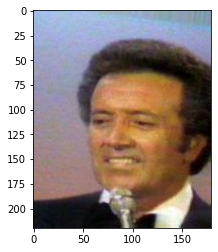

In [189]:
temp = list()
temp.append(np.pad(image.imread("../img_align_celeba/000321.jpg").reshape(218, 178, 3), ((1,1),(1,1),(0,0)), "edge"))
temp.append(np.pad(image.imread("../img_align_celeba/001567.jpg").reshape(218, 178, 3), ((1,1),(1,1),(0,0)), "edge"))
temp_test = np.array(temp)
temp_test = temp_test.astype('float32') / 255.
decoded_imgs = autoencoder1.predict(temp_test)
plt.imshow(temp[0])

# encoded_imgs1 = encoder1.predict(x_test)
# decoded_imgs1= decoder1.predict(encoded_imgs1)

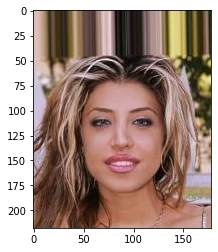

In [65]:
plt.imshow(temp[1])

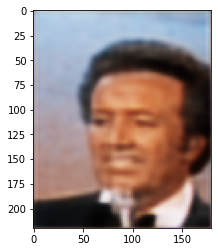

In [190]:
plt.imshow(decoded_imgs[0])

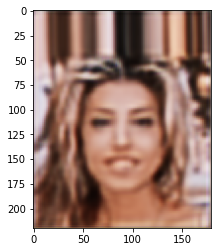

In [191]:
plt.imshow(decoded_imgs[1])